In [24]:
import numpy as np
import pandas as pd
import os
import seaborn as sea

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, normalize, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier

import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [25]:
sea.set_style('darkgrid')

In [26]:
#Read and Print diabes.csv out screen
df = pd.read_csv("diabetes.csv")
df.head(10).style. \
                    set_properties(**{"min-width": "60px"}). \
                    set_properties(**{"color": "#111111"}). \
                    set_properties(**{"text-align": "center"}). \
                    set_table_styles([
                          {"selector": "th",
                           "props": [("font-weight", "bold"),
                                     ("font-size", "12px"),
                                     ("text-align", "center")]},
                          {"selector": "tr:nth-child(even)",
                           "props": [("background-color", "#f2f2f2")]},
                          {"selector": "tr:nth-child(odd)",
                           "props": [("background-color", "#fdfdfd")]},
                          {"selector": "tr:hover",
                           "props": [("background-color", "#bcbcbc")]}])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
5,5,116,74,0,0,25.600000,0.201000,30,0
6,3,78,50,32,88,31.000000,0.248000,26,1
7,10,115,0,0,0,35.300000,0.134000,29,0
8,2,197,70,45,543,30.500000,0.158000,53,1
9,8,125,96,0,0,0.000000,0.232000,54,1


In [27]:
#Drop Columns
pd.options.mode.chained_assignment = None

x = df.loc[:,df.columns != "Outcome"]
y = df[["Outcome"]]
#Print missing data
print("Print the missing value contains \n",df.isnull().sum())
#Print Data_info
print("x_data info: \n")
x.info()
print("\ny_data info: \n")
y.info()

Print the missing value contains 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
x_data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float

In [28]:
y["Outcome"].value_counts() #Count 2 form

Outcome
0    500
1    268
Name: count, dtype: int64

In [29]:
#Split the test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [30]:
def plots(feature):
    fig = plt.figure(constrained_layout=True, figsize=(10, 3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)
    ax1 = fig.add_subplot(gs[0, :3])

    # Plot histograms
    sea.histplot(data=x_train.loc[y_train["Outcome"] == 0, feature],
                 kde=False, color="#004a4d", bins=40, stat="count",
                 label="Not Diabetes", ax=ax1)
    sea.histplot(data=x_train.loc[y_train["Outcome"] == 1, feature],
                 kde=False, color="#7d0101", bins=40, stat="count",
                 label="Diabetes", ax=ax1)

    ax2 = fig.add_subplot(gs[0, 3])

    # Plot boxplot
    sea.boxplot(data=x_train, x=feature, orient="v", color="#989100", width=0.2, ax=ax2)

    ax1.legend(loc="upper right")

/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

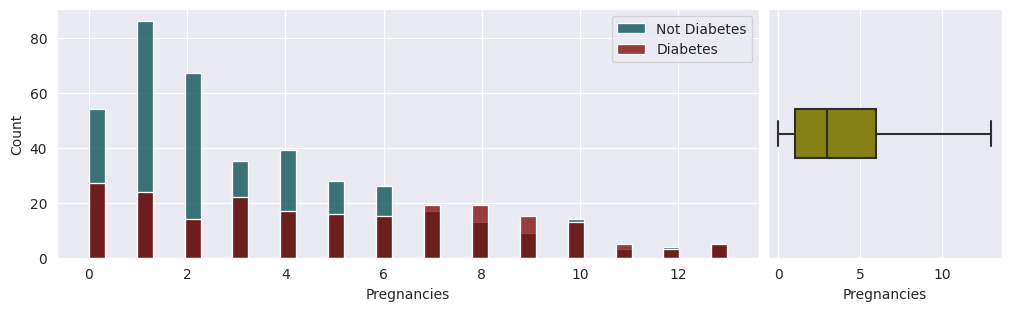

In [31]:
Q1 = x_train["Pregnancies"].quantile(0.25)
Q3 = x_train["Pregnancies"].quantile(0.75)
q95th = x_train["Pregnancies"].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

x_train["Pregnancies"] = np.where(x_train["Pregnancies"] > UW,
                                  q95th, x_train["Pregnancies"])
plots("Pregnancies")

/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

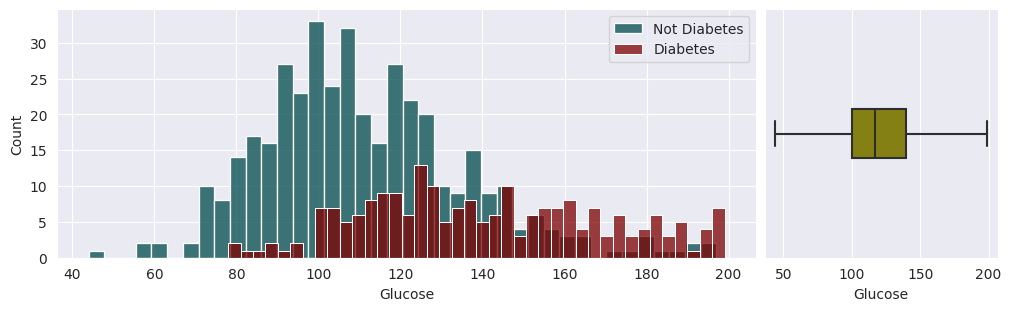

In [32]:
#Replace 0 values with median
med = x_train["Glucose"].median()
x_train["Glucose"] = np.where(x_train["Glucose"] == 0, med, x_train["Glucose"])
plots("Glucose")

/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

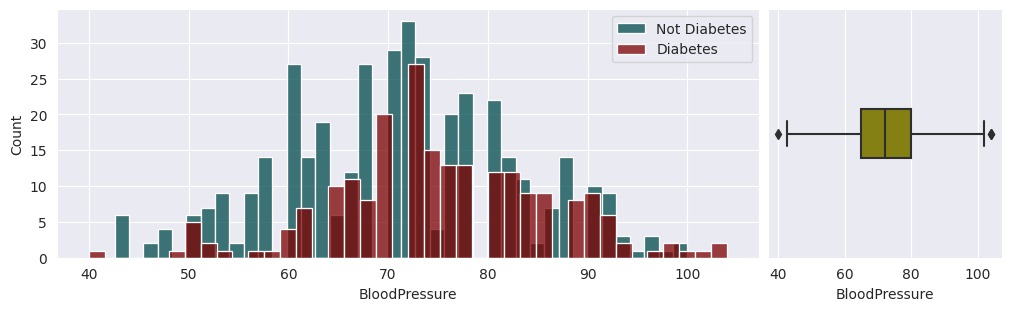

In [33]:
med = x_train["BloodPressure"].median()
q5th = x_train["BloodPressure"].quantile(0.05)
q95th = x_train["BloodPressure"].quantile(0.95)
Q1 = x_train["BloodPressure"].quantile(0.25)
Q3 = x_train["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5*IQR
UW = Q3 + 1.5*IQR
#Remove some 0 values for BloodPressure -> Replace with median
x_train["BloodPressure"] = np.where(x_train["BloodPressure"] == 0,
                                    med, x_train["BloodPressure"])
x_train["BloodPressure"] = np.where(x_train["BloodPressure"] < LW,
                                    q5th, x_train["BloodPressure"])
x_train["BloodPressure"] = np.where(x_train["BloodPressure"] > UW,
                                    q95th, x_train["BloodPressure"])
plots("BloodPressure")

/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

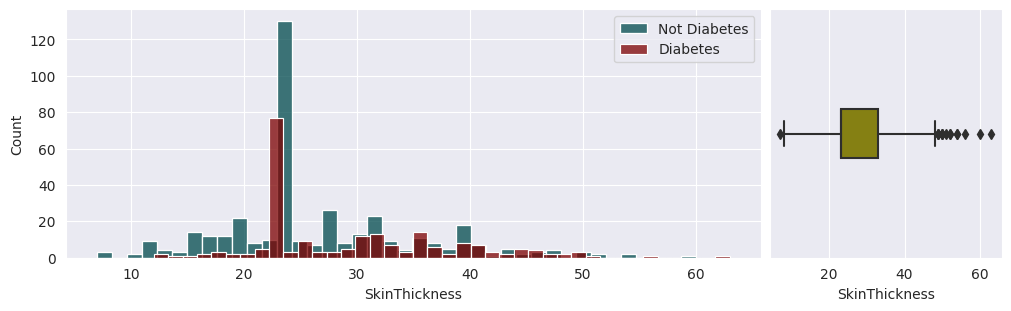

In [34]:
med = x_train["SkinThickness"].median()
q95th = x_train["SkinThickness"].quantile(0.95)
Q1 = x_train["SkinThickness"].quantile(0.25)
Q3 = x_train["SkinThickness"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
#Replace 0 values
x_train["SkinThickness"] = np.where(x_train["SkinThickness"] == 0,
                                    med, x_train["SkinThickness"])
x_train["SkinThickness"] = np.where(x_train["SkinThickness"] > UW,
                                    q95th, x_train["SkinThickness"])

plots("SkinThickness")

/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

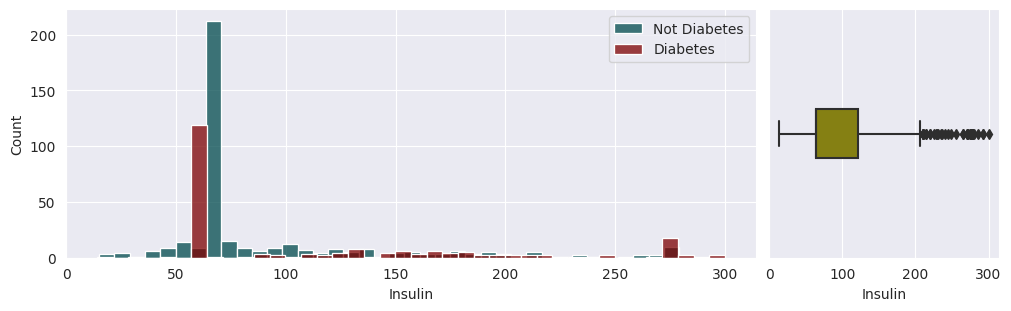

In [35]:
q60th = x_train["Insulin"].quantile(0.60)
q95th = x_train["Insulin"].quantile(0.95)
Q1 = x_train["Insulin"].quantile(0.25)
Q3 = x_train["Insulin"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
#Remove 0 values
x_train["Insulin"] = np.where(x_train["Insulin"] == 0,
                              q60th, x_train["Insulin"])
x_train["Insulin"] = np.where(x_train["Insulin"] > UW,
                              q95th, x_train["Insulin"])
plots("Insulin")

/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

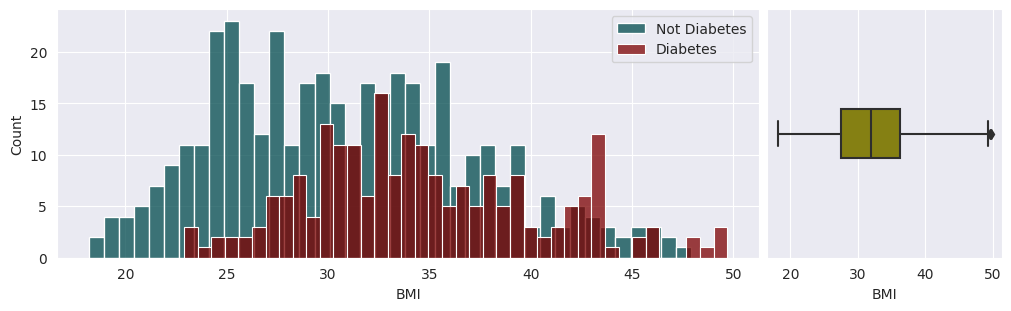

In [36]:
med = x_train["BMI"].median()
q95th = x_train["BMI"].quantile(0.95)
Q1 = x_train["BMI"].quantile(0.25)
Q3 = x_train["BMI"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

x_train["BMI"] = np.where(x_train["BMI"] == 0,
                          med, x_train["BMI"])
x_train["BMI"] = np.where(x_train["BMI"] > UW,
                          q95th, x_train["BMI"])
plots("BMI")

/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

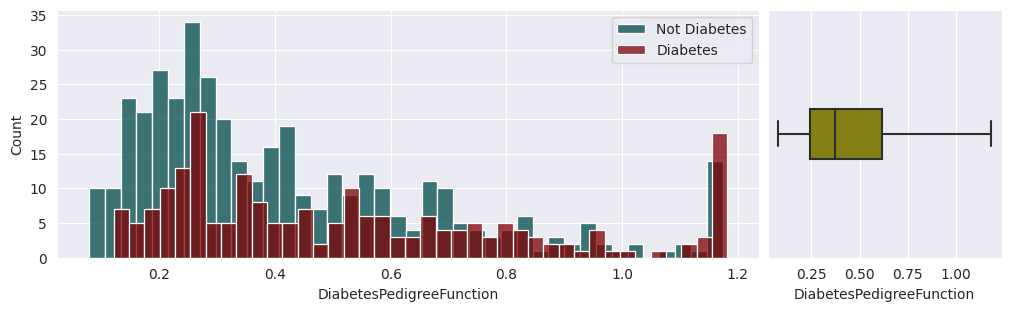

In [37]:
q95th = x_train["DiabetesPedigreeFunction"].quantile(0.95)
Q1 = x_train["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = x_train["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
#Replace values greater than UW with 95th quantile
x_train["DiabetesPedigreeFunction"] = np.where(
                        x_train["DiabetesPedigreeFunction"] > UW,
                        q95th, x_train["DiabetesPedigreeFunction"])
plots("DiabetesPedigreeFunction")

/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anhdung/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

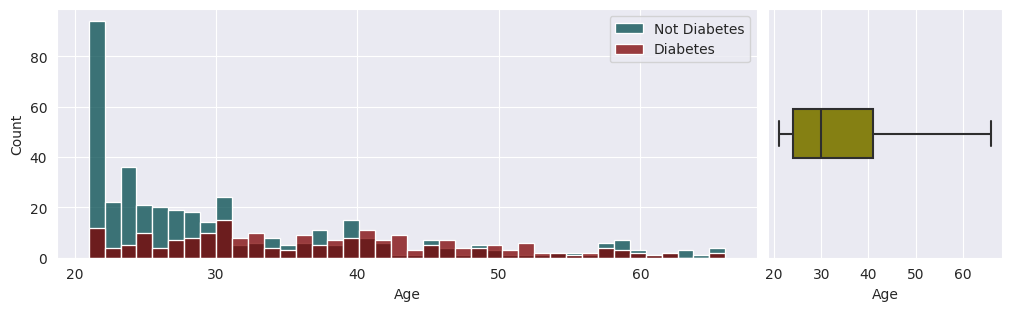

In [38]:
q95th = x_train["Age"].quantile(0.95)
Q1 = x_train["Age"].quantile(0.25)
Q3 = x_train["Age"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

x_train["Age"] = np.where(x_train["Age"] > UW,
                          q95th, x_train["Age"])
plots("Age")

In [39]:
#Standarization
scaler_ti = StandardScaler()
x_train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = scaler_ti.fit_transform(x_train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
x_test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = scaler_ti.fit_transform(x_test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

In [40]:
#Single Perceptron
ppn_clf = Perceptron(eta0=0.001,max_iter=5000,random_state=1)
ppn_clf.fit(x_train,y_train.values.ravel())

Perceptron(eta0=0.001, max_iter=5000, random_state=1)

In [41]:
y_pred = ppn_clf.predict(x_test)
report = classification_report(y_test,y_pred, digits=4, target_names=["Not Diabetes", "Diabetes"])

In [42]:
#Print report and accuracy of Single Perceptron
print("Report",report)
print("Accuracy", accuracy_score(y_test,y_pred))

Report               precision    recall  f1-score   support

Not Diabetes     0.8434    0.7000    0.7650       100
    Diabetes     0.5775    0.7593    0.6560        54

    accuracy                         0.7208       154
   macro avg     0.7104    0.7296    0.7105       154
weighted avg     0.7501    0.7208    0.7268       154

Accuracy 0.7207792207792207


In [43]:
x_train.drop("SkinThickness",axis=1,inplace=True)
x_test.drop("SkinThickness",axis=1,inplace=True)

In [44]:
#Multiple Layer Perceptron (MLP)
mlp_clf = MLPClassifier(solver="adam", max_iter=5000, activation="relu",
                        hidden_layer_sizes= (12),
                        alpha = 0.01,
                        batch_size = 64,
                        learning_rate_init = 0.001,
                        random_state=2)
mlp_clf.fit(x_train,y_train.values.ravel())

MLPClassifier(alpha=0.01, batch_size=64, hidden_layer_sizes=12, max_iter=5000,
              random_state=2)

In [45]:
y_pred = mlp_clf.predict(x_test)
report = classification_report(y_test,y_pred, digits=4, target_names=["Not Diabetes", "Diabetes"])

In [46]:
#Print report and accuracy of Single Perceptron
print("Report",report)
print("Accuracy", accuracy_score(y_test,y_pred))

Report               precision    recall  f1-score   support

Not Diabetes     0.8762    0.9200    0.8976       100
    Diabetes     0.8367    0.7593    0.7961        54

    accuracy                         0.8636       154
   macro avg     0.8565    0.8396    0.8468       154
weighted avg     0.8624    0.8636    0.8620       154

Accuracy 0.8636363636363636
